## Business Case

For the Chicago Department of Transportation, as a data scientist, my job is to go over the city’s traffic accident reports and create a model that will predict the worst incidences. In doing so, I will find some underlying causes and possible advice for the city.   


For the Chicago Department of Transportation, this data will help reduce the number of traffic accidents that result in injury. 


## Notebook Goal

The task for this notebook is to collect the data, fix any inconsistencies and to export the 'cleaned' data to a .csv file for the next notebook to start the modeling process on.

## Data

The data is coming from three separate csv files extracted from [cityofchicago.org](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if)  
I will import each file and sort though the original features determining what I want in my classification model  
After sorting though each csv file, I will then 'join' them all under one dataset.

Each row in the new dataset will represent one driver in any given crash.


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style='darkgrid')

from IPython.display import display
pd.set_option('display.max_columns', None)

### Importing Crashes Dataframe

The Traffic crashes -crashes .csv file features all the possible attributes per car accident.

In [2]:
df_crashes = pd.read_csv('data/Traffic_Crashes_-_Crashes.csv')

My classification model will be predicting if a crash is expected to result in a injury without knowing the condition of anyone involved.  
To do this, I will need to engineer a new predictor column 'IS_SEVERE'.  
'IS_SEVERE' is determined if there any type of injury to anyone in a car accident.

In [4]:
# create new column 'IS_Severe' to 0's
df_crashes['IS_SEVERE'] = 0

# if car needs to be towed or person(s) injured
df_crashes.loc[df_crashes['CRASH_TYPE'] == 'INJURY AND / OR TOW DUE TO CRASH', 'IS_SEVERE'] = 1

# if person(s) injured
df_crashes.loc[(df_crashes['MOST_SEVERE_INJURY'] == 'NONINCAPACITATING INJURY') | 
       (df_crashes['MOST_SEVERE_INJURY'] == 'REPORTED, NOT EVIDENT') | 
       (df_crashes['MOST_SEVERE_INJURY'] == 'INCAPACITATING INJURY') | 
       (df_crashes['MOST_SEVERE_INJURY'] == 'FATAL'), 
       'IS_SEVERE'] = 1

In [5]:
non_related_data = [
    'RD_NO', 'DATE_POLICE_NOTIFIED', 'BEAT_OF_OCCURRENCE', 'LOCATION', 
    'CRASH_DATE_EST_I', 'LANE_CNT', 'REPORT_TYPE', 'PHOTOS_TAKEN_I', 
    'STATEMENTS_TAKEN_I','CRASH_DATE', 'CRASH_TYPE',  'HIT_AND_RUN_I',
    'DAMAGE', 'STREET_NO', 'STREET_DIRECTION', 'DOORING_I', 'WORK_ZONE_I',
    'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
    'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
    'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 
    'INJURIES_UNKNOWN', 'STREET_NAME', 'LATITUDE', 'LONGITUDE',
    'SEC_CONTRIBUTORY_CAUSE'
    ]

df_crashes.drop(columns=non_related_data, axis=1, inplace=True)
df_crashes

,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,PRIM_CONTRIBUTORY_CAUSE,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,IS_SEVERE
0,073682ef84ff827659552d4254ad1b98bfec24935cc9cc...,10,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NaN,NOT APPLICABLE,NaN,NaN,2,18,3,10,0
1,1560fb8a1e32b528fef8bfd677d2b3fc5ab37278b157fa...,45,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NaN,UNABLE TO DETERMINE,NaN,NaN,2,16,5,6,0
2,c7e667807d86ff2e83da48267e1135680cad68c86eb00f...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,ONE-WAY,STRAIGHT AND LEVEL,WET,NO DEFECTS,NaN,NaN,FAILING TO YIELD RIGHT-OF-WAY,NaN,NaN,2,16,5,2,1
3,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,Y,NaN,FAILING TO YIELD RIGHT-OF-WAY,NaN,NaN,2,16,6,6,1
4,00e47f189660cd8ba1e85fc63061bf1d8465184393f134...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,Y,NaN,UNABLE TO DETERMINE,NaN,NaN,2,22,5,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462595,0bba5c9192545790524c2af43b8c423619f8d37f9e72ac...,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,Y,NaN,DISREGARDING STOP SIGN,NaN,NaN,2,9,3,7,0
462596,5414cb734ce44cf34d1e16df2453ad6221e7cb1f0049be...,30,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NaN,FAILING TO YIELD RIGHT-OF-WAY,NaN,NaN,2,17,4,7,1
462597,b6e0b0388cb9f3a250c3036a03cd664590ec2f465ac4d1...,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,HEAD ON,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NaN,FAILING TO YIELD RIGHT-OF-WAY,NaN,NaN,2,10,4,7,1
462598,df74080be8ceeb327edd744a7f34507bc32c3f76a3f00c...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NaN,UNABLE TO DETERMINE,NaN,NaN,2,14,4,7,0


### Importing People Dataframe

The Traffic crashes -people csv takes in data from every person who is involved in the accident.

In [5]:
df_people = pd.read_csv('data/Traffic_Crashes_-_People.csv')

C:\Users\Deric\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (20,24,25,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Since our data is going to reflect only drivers per row of the 'joined' datasets, I am limiting the type of person involved to just driver. To only collect data about the driver.

In [6]:
df_people = df_people[df_people['PERSON_TYPE'] == 'DRIVER']

In [7]:
cols=['CRASH_RECORD_ID', 'VEHICLE_ID',  'CITY', 'SEX',
      'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT']

df_people =df_people[cols]
df_people

,CRASH_RECORD_ID,VEHICLE_ID,CITY,SEX,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT
0,2e31858c0e411f0bdcb337fb7c415aa93763cf2f23e02f...,10.0,CHICAGO,M,NaN,USAGE UNKNOWN
1,e73b35bd7651b0c6693162bee0666db159b28901437009...,96.0,ELK GROVE,M,NaN,SAFETY BELT USED
2,f2b1adeb85a15112e4fb7db74bff440d6ca53ff7a21e10...,954.0,CHICAGO,M,D,USAGE UNKNOWN
3,15a3e24fce3ce7cd2b02d44013d1a93ff2fbdca80632ec...,9561.0,SKOKIE,M,D,SAFETY BELT USED
4,2fcefeab458932d8b1b12e103c18c50adc659943cccd4b...,96762.0,NaN,X,NaN,USAGE UNKNOWN
...,...,...,...,...,...,...
1024845,1d75d9596feabac154e0630053ad5b74b5bda214561a63...,952903.0,CHICAGO,M,NaN,USAGE UNKNOWN
1024846,1d75d9596feabac154e0630053ad5b74b5bda214561a63...,952904.0,CHICAGO,F,D,SAFETY BELT USED
1024847,e694f71d7ca1ca065280cb1fe7f8fc562b2cc6674a32d8...,954387.0,NaN,M,NaN,USAGE UNKNOWN
1024848,e694f71d7ca1ca065280cb1fe7f8fc562b2cc6674a32d8...,954388.0,CHICAGO,M,D,SAFETY BELT USED


### Importing Vehicle Dataframe

The Traffic Crashes -Vehicle .csv file takes in data about the vehicles involved in the traffic accidents.

In [8]:
df_vehicles = pd.read_csv('data/Traffic_Crashes_-_Vehicles.csv')

C:\Users\Deric\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,55,58,59,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
cols = ['CRASH_RECORD_ID', 'VEHICLE_ID', 'NUM_PASSENGERS', 'CMRC_VEH_I',
        'VEHICLE_DEFECT', 'EXCEED_SPEED_LIMIT_I', 'FIRST_CONTACT_POINT'] 

df_vehicles = df_vehicles[cols]
df_vehicles

,CRASH_RECORD_ID,VEHICLE_ID,NUM_PASSENGERS,CMRC_VEH_I,VEHICLE_DEFECT,EXCEED_SPEED_LIMIT_I,FIRST_CONTACT_POINT
0,2e31858c0e411f0bdcb337fb7c415aa93763cf2f23e02f...,10.0,NaN,NaN,NONE,NaN,FRONT
1,e73b35bd7651b0c6693162bee0666db159b28901437009...,96.0,NaN,NaN,NONE,NaN,FRONT
2,f2b1adeb85a15112e4fb7db74bff440d6ca53ff7a21e10...,954.0,NaN,NaN,UNKNOWN,NaN,FRONT
3,15a3e24fce3ce7cd2b02d44013d1a93ff2fbdca80632ec...,9561.0,NaN,NaN,NONE,NaN,REAR
4,1d3c178880366c77deaf06b8c3198429112a1c8e8807ed...,96745.0,NaN,NaN,UNKNOWN,NaN,UNKNOWN
...,...,...,...,...,...,...,...
943813,fbea3744fc12b228a21abc5e8bf16dcef144470d6a8ab3...,945161.0,NaN,NaN,NONE,NaN,TOTAL (ALL AREAS)
943814,3c22094fc9de9d058b65eaf48739e9c8bb007e1c981f47...,945174.0,NaN,NaN,UNKNOWN,NaN,UNKNOWN
943815,3c22094fc9de9d058b65eaf48739e9c8bb007e1c981f47...,945177.0,NaN,NaN,NONE,NaN,FRONT-LEFT
943816,f9280957bd482220fac4d2370bbb84d27a40c53ee447bb...,946505.0,NaN,NaN,UNKNOWN,NaN,FRONT


### Joining Datasets

For the model to work on all chosen features, I will need to 'merge' the three data-sets into one based off of the 'CRASH_RECORD_ID' and the 'VEHICLE_ID' columns.

In [10]:
# merge df_vehicles to df_people from both id's
df_half = pd.merge(df_vehicles, df_people, on=['CRASH_RECORD_ID', 'VEHICLE_ID'])

#merge df_crashes to df_half on id
df_full = pd.merge(df_half, df_crashes, on='CRASH_RECORD_ID')

df_full.drop(columns = ['CRASH_RECORD_ID', 'VEHICLE_ID'], axis=1, inplace=True)
df_full

,NUM_PASSENGERS,CMRC_VEH_I,VEHICLE_DEFECT,EXCEED_SPEED_LIMIT_I,FIRST_CONTACT_POINT,CITY,SEX,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,PRIM_CONTRIBUTORY_CAUSE,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,IS_SEVERE
0,NaN,NaN,NONE,NaN,FRONT,CHICAGO,M,NaN,USAGE UNKNOWN,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,Y,NaN,UNABLE TO DETERMINE,NaN,NaN,2,12,3,8,0
1,NaN,NaN,NONE,NaN,FRONT-LEFT,ORLAND PARK,M,D,SAFETY BELT USED,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,Y,NaN,UNABLE TO DETERMINE,NaN,NaN,2,12,3,8,0
2,NaN,NaN,NONE,NaN,FRONT,ELK GROVE,M,NaN,SAFETY BELT USED,25,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NaN,FOLLOWING TOO CLOSELY,NaN,NaN,2,17,6,7,0
3,NaN,NaN,NONE,NaN,REAR,PLAINFIELD,M,D,SAFETY BELT USED,25,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NaN,FOLLOWING TOO CLOSELY,NaN,NaN,2,17,6,7,0
4,NaN,NaN,UNKNOWN,NaN,FRONT,CHICAGO,M,D,USAGE UNKNOWN,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NaN,UNABLE TO DETERMINE,NaN,NaN,2,11,4,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794839,1.0,NaN,NONE,NaN,SIDE-RIGHT,CICERO,M,D,USAGE UNKNOWN,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,WET,NO DEFECTS,Y,NaN,DISREGARDING TRAFFIC SIGNALS,NaN,NaN,2,23,7,11,1
794840,NaN,NaN,UNKNOWN,NaN,UNKNOWN,NaN,X,NaN,USAGE UNKNOWN,30,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NaN,UNABLE TO DETERMINE,NaN,NaN,2,11,7,11,0
794841,NaN,NaN,UNKNOWN,NaN,UNKNOWN,NaN,X,NaN,USAGE UNKNOWN,30,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,UNKNOWN,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NaN,NaN,UNABLE TO DETERMINE,NaN,NaN,2,18,7,11,0
794842,NaN,NaN,UNKNOWN,NaN,FRONT,NaN,M,NaN,USAGE UNKNOWN,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NaN,IMPROPER OVERTAKING/PASSING,NaN,NaN,2,19,7,11,0


In [11]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 794844 entries, 0 to 794843
Data columns (total 29 columns):
NUM_PASSENGERS             132106 non-null float64
CMRC_VEH_I                 16113 non-null object
VEHICLE_DEFECT             793888 non-null object
EXCEED_SPEED_LIMIT_I       2334 non-null object
FIRST_CONTACT_POINT        789214 non-null object
CITY                       613409 non-null object
SEX                        794747 non-null object
DRIVERS_LICENSE_CLASS      529883 non-null object
SAFETY_EQUIPMENT           794844 non-null object
POSTED_SPEED_LIMIT         794844 non-null int64
TRAFFIC_CONTROL_DEVICE     794844 non-null object
DEVICE_CONDITION           794844 non-null object
WEATHER_CONDITION          794844 non-null object
LIGHTING_CONDITION         794844 non-null object
FIRST_CRASH_TYPE           794844 non-null object
TRAFFICWAY_TYPE            794844 non-null object
ALIGNMENT                  794844 non-null object
ROADWAY_SURFACE_COND       794844 non-null

> the table above shows that we are missing several values and incorrect data types

## Cleaning data

In this stage, I am looking into every feature of the dataset to fix any inconsistencies and abnormal data.

### functions

In [12]:
def na_val_count(col):
    #prints the sum of nan values and value counts
    
    print(".isna().sum() = ", df_full[col].isna().sum())
    print("value_counts:")
    print(df_full[col].value_counts())

> the function above will help streamline the process since I will be 'printing' the missing values and the value counts on every feature

### severity

In [13]:
df_full['IS_SEVERE'].value_counts()

0    601074
1    193770
Name: IS_SEVERE, dtype: int64

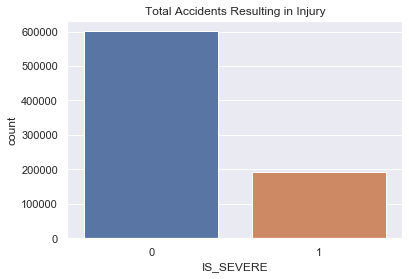

In [14]:
ax = sns.countplot(x='IS_SEVERE', data=df_full).set_title('Total Accidents Resulting in Injury')

In [15]:
severe_len = len(df_full[df_full['IS_SEVERE'] == 1])
severe_percent = (severe_len / len(df_full)) * 100
print(round(severe_percent, 1), 'percent of car incidences result in injury')

24.4 percent of car incidences result in injury


> this graph shows that 24.4 percent of car accidents resulted in some type of injury to the body.  
> This is slightly imbalanced but possibly not a bad thing.  
> Will need to mindful of the Recall score 

### num_passengers

In [16]:
na_val_count('NUM_PASSENGERS')

.isna().sum() =  662738
value_counts:
1.0     92518
2.0     24799
3.0      9891
4.0      3250
5.0       865
6.0       330
7.0       130
8.0        74
10.0       45
9.0        44
12.0       27
11.0       24
14.0       15
13.0       12
15.0       11
18.0        8
19.0        6
17.0        5
16.0        5
28.0        4
35.0        4
25.0        4
20.0        4
27.0        4
29.0        3
38.0        2
34.0        2
43.0        2
24.0        2
32.0        2
40.0        2
21.0        2
23.0        2
46.0        1
42.0        1
30.0        1
37.0        1
36.0        1
26.0        1
33.0        1
59.0        1
Name: NUM_PASSENGERS, dtype: int64


In [17]:
df_full.drop(df_full[df_full['NUM_PASSENGERS'] > 8].index, inplace = True)

df_full['NUM_PASSENGERS'].fillna(0, inplace=True)
df_full['NUM_PASSENGERS'] = df_full['NUM_PASSENGERS'].astype(int)

na_val_count('NUM_PASSENGERS')

.isna().sum() =  0
value_counts:
0    662738
1     92518
2     24799
3      9891
4      3250
5       865
6       330
7       130
8        74
Name: NUM_PASSENGERS, dtype: int64


### cmrc_veh_i

In [18]:
na_val_count('CMRC_VEH_I')

.isna().sum() =  778555
value_counts:
Y    10736
N     5304
Name: CMRC_VEH_I, dtype: int64


In [19]:
df_full['CMRC_VEH_I'].fillna('N', inplace=True)

na_val_count('CMRC_VEH_I')

.isna().sum() =  0
value_counts:
N    783859
Y     10736
Name: CMRC_VEH_I, dtype: int64


### vehicle_defect

In [20]:
na_val_count('VEHICLE_DEFECT')

.isna().sum() =  956
value_counts:
NONE                453306
UNKNOWN             331747
OTHER                 4041
BRAKES                2972
TIRES                  425
STEERING               399
WHEELS                 221
SUSPENSION             141
ENGINE/MOTOR            99
FUEL SYSTEM             91
LIGHTS                  64
WINDOWS                 50
CARGO                   28
SIGNALS                 19
RESTRAINT SYSTEM        14
EXHAUST                 11
TRAILER COUPLING        11
Name: VEHICLE_DEFECT, dtype: int64


In [21]:
df_full['VEHICLE_DEFECT'].fillna('NO', inplace=True)

df_full.loc[(df_full['VEHICLE_DEFECT'] == 'NONE') | 
       (df_full['VEHICLE_DEFECT'] == 'UNKNOWN'), 
       'VEHICLE_DEFECT'] = 'NO'

df_full.loc[(df_full['VEHICLE_DEFECT'] != 'NO'), 
       'VEHICLE_DEFECT'] = 'YES'

na_val_count('VEHICLE_DEFECT')

.isna().sum() =  0
value_counts:
NO     786009
YES      8586
Name: VEHICLE_DEFECT, dtype: int64


### exceed_speed_limit_i

In [22]:
na_val_count('EXCEED_SPEED_LIMIT_I')

.isna().sum() =  792263
value_counts:
Y    1771
N     561
Name: EXCEED_SPEED_LIMIT_I, dtype: int64


In [23]:
df_full['EXCEED_SPEED_LIMIT_I'].fillna('N', inplace=True)

na_val_count('EXCEED_SPEED_LIMIT_I')

.isna().sum() =  0
value_counts:
N    792824
Y      1771
Name: EXCEED_SPEED_LIMIT_I, dtype: int64


### first_contact_point

In [24]:
na_val_count('FIRST_CONTACT_POINT')

.isna().sum() =  5627
value_counts:
FRONT                146139
REAR                  88242
UNKNOWN               79999
FRONT-RIGHT           74418
REAR-LEFT             70693
FRONT-LEFT            70490
OTHER                 68460
SIDE-RIGHT            52388
SIDE-LEFT             38901
TOTAL (ALL AREAS)     35600
REAR-RIGHT            33153
ROOF                  16324
NONE                   8192
UNDER CARRIAGE         5969
Name: FIRST_CONTACT_POINT, dtype: int64


In [25]:
df_full['FIRST_CONTACT_POINT'].fillna('NONE', inplace=True)

na_val_count('FIRST_CONTACT_POINT')

.isna().sum() =  0
value_counts:
FRONT                146139
REAR                  88242
UNKNOWN               79999
FRONT-RIGHT           74418
REAR-LEFT             70693
FRONT-LEFT            70490
OTHER                 68460
SIDE-RIGHT            52388
SIDE-LEFT             38901
TOTAL (ALL AREAS)     35600
REAR-RIGHT            33153
ROOF                  16324
NONE                  13819
UNDER CARRIAGE         5969
Name: FIRST_CONTACT_POINT, dtype: int64


### city

In [26]:
na_val_count('CITY')

.isna().sum() =  181432
value_counts:
CHICAGO            424869
CICERO               6084
SKOKIE               4516
EVANSTON             3674
BERWYN               3668
                    ...  
HOLLY SPGS              1
UPPER KENOSHA           1
MOUNT SOLON             1
MARTINTON               1
CLARKSON VALLEY         1
Name: CITY, Length: 8637, dtype: int64


In [27]:
df_full['CITY'].fillna('CHICAGO', inplace=True)

df_full.loc[(df_full['CITY'] != 'CHICAGO'),
            'CITY'] = 'Out of Town'

na_val_count('CITY')

.isna().sum() =  0
value_counts:
CHICAGO        606301
Out of Town    188294
Name: CITY, dtype: int64


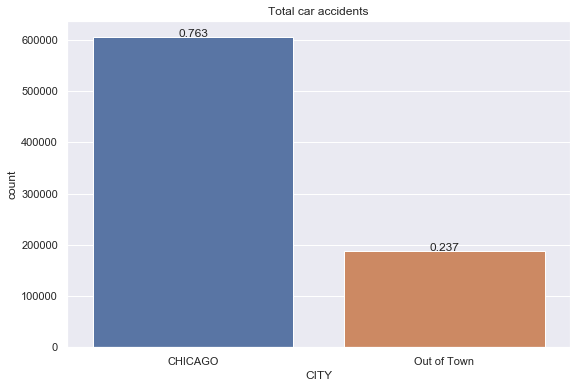

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
sns.countplot(x='CITY', data=df_full).set_title('Total car accidents');

total = float(len(df_full))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}'.format(height/total),
            ha="center") 

> The graph above shows the 23.7 percent of all wrecks are caused by out of town drivers.  
> Chicago is a huge tourist town and it is possible that the out-of-town drivers are from the suburbs of Chicago.

In [29]:
df = df_full[['CITY','IS_SEVERE']]

df_city_severe = df[df['IS_SEVERE'] == 1]
df_city_non = df[df['IS_SEVERE'] == 0]

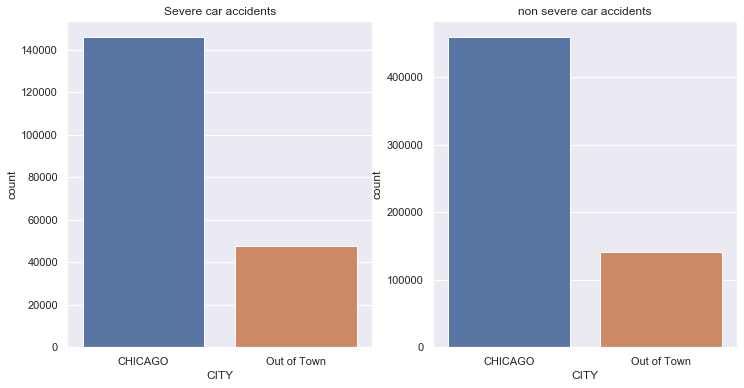

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

sns.countplot(x='CITY', data=df_city_severe, ax=ax[0]).set_title('Severe car accidents');
sns.countplot(x='CITY', data=df_city_non, ax=ax[1]).set_title('non severe car accidents');

In [31]:
out_count_severe = len(df_city_severe[df_city_severe['CITY'] == 'Out of Town'])
out_percent_severe = (out_count_severe / len(df_city_severe)) * 100
print(round(out_percent_severe, 1), 'percent of severe car incidences are caused by out-of-town Drivers')

24.5 percent of severe car incidences are caused by out-of-town Drivers


In [32]:
out_count_non = len(df_city_non[df_city_non['CITY'] == 'Out of Town'])
out_percent_non =(out_count_non / len(df_city_non)) * 100

print(round(out_percent_non, 1), 'percent of non-severe car incidences are caused by out-of-town Drivers')

23.4 percent of non-severe car incidences are caused by out-of-town Drivers


> out of town drivers are accountable for roughly 24.5% of the recorded car accidents  
> out of town drivers are accountable for roughly 23.4% of the non severe and severe car accidents alike

### sex

In [33]:
na_val_count("SEX")

.isna().sum() =  97
value_counts:
M    435011
F    280855
X     78632
Name: SEX, dtype: int64


In [34]:
df_full['SEX'].fillna('X', inplace = True)
na_val_count("SEX")

.isna().sum() =  0
value_counts:
M    435011
F    280855
X     78729
Name: SEX, dtype: int64


### drivers_license_class

In [35]:
na_val_count('DRIVERS_LICENSE_CLASS')

.isna().sum() =  264931
value_counts:
D     461695
A      17770
C      14545
B      13965
DM      8743
       ...  
IF         1
TR         1
HH         1
CJ         1
A1         1
Name: DRIVERS_LICENSE_CLASS, Length: 230, dtype: int64


In [36]:
df_full['DRIVERS_LICENSE_CLASS'].fillna('D', inplace=True)

df_full.loc[(df_full['DRIVERS_LICENSE_CLASS'] != 'D'), 
            'DRIVERS_LICENSE_CLASS'] = "Other"

na_val_count('DRIVERS_LICENSE_CLASS')

.isna().sum() =  0
value_counts:
D        726626
Other     67969
Name: DRIVERS_LICENSE_CLASS, dtype: int64


### safety_equipment

In [37]:
na_val_count('SAFETY_EQUIPMENT')

.isna().sum() =  0
value_counts:
SAFETY BELT USED                       406390
USAGE UNKNOWN                          367928
NONE PRESENT                            15068
SAFETY BELT NOT USED                     3343
HELMET NOT USED                           855
HELMET USED                               452
DOT COMPLIANT MOTORCYCLE HELMET           420
NOT DOT COMPLIANT MOTORCYCLE HELMET        77
SHOULD/LAP BELT USED IMPROPERLY            59
WHEELCHAIR                                  2
CHILD RESTRAINT USED                        1
Name: SAFETY_EQUIPMENT, dtype: int64


In [38]:
df_full.loc[(df_full['SAFETY_EQUIPMENT'] == 'SAFETY BELT USED') |
           (df_full['SAFETY_EQUIPMENT'] == 'HELMET USED') |
           (df_full['SAFETY_EQUIPMENT'] == 'DOT COMPLIANT MOTORCYCLE HELMET'),
           'SAFETY_EQUIPMENT'] = 'SAFETY BELT/HELMENT USED'

df_full.loc[(df_full['SAFETY_EQUIPMENT'] == 'SAFETY BELT NOT USED') |
           (df_full['SAFETY_EQUIPMENT'] == 'HELMET NOT USED') |
           (df_full['SAFETY_EQUIPMENT'] == 'SHOULD/LAP BELT USED IMPROPERLY') |
           (df_full['SAFETY_EQUIPMENT'] == 'NOT DOT COMPLIANT MOTORCYCLE HELMET'),
           'SAFETY_EQUIPMENT'] = 'NONE PRESENT'

df_full.loc[(df_full['SAFETY_EQUIPMENT'] == 'CHILD RESTRAINT USED') |
           (df_full['SAFETY_EQUIPMENT'] == 'WHEELCHAIR'),
           'SAFETY_EQUIPMENT'] = 'USAGE UNKNOWN'

na_val_count('SAFETY_EQUIPMENT')

.isna().sum() =  0
value_counts:
SAFETY BELT/HELMENT USED    407262
USAGE UNKNOWN               367931
NONE PRESENT                 19402
Name: SAFETY_EQUIPMENT, dtype: int64


### posted_speed_limit

In [39]:
na_val_count('POSTED_SPEED_LIMIT')

.isna().sum() =  0
value_counts:
30    600575
35     58474
25     43872
20     25725
15     22133
10     13079
0      10388
40      8265
45      5339
5       4903
55       810
3        195
50       182
9        157
99       118
39        94
1         51
60        46
2         28
32        24
24        22
65        21
33        19
34        11
6         10
36         9
11         9
14         4
31         4
26         4
18         3
12         3
7          3
70         3
38         2
22         2
23         2
63         2
29         2
49         1
4          1
Name: POSTED_SPEED_LIMIT, dtype: int64


In [40]:
df_full['POSTED_SPEED_LIMIT'] = df_full['POSTED_SPEED_LIMIT'].apply(
    lambda x: '30 mph or lower' if x<31 else (
        '50 mph or greater' if x>49 else 'between 31 mph and 49 mph'))

na_val_count('POSTED_SPEED_LIMIT')

.isna().sum() =  0
value_counts:
30 mph or lower              721171
between 31 mph and 49 mph     72242
50 mph or greater              1182
Name: POSTED_SPEED_LIMIT, dtype: int64


### traffic_control_device

In [41]:
na_val_count('TRAFFIC_CONTROL_DEVICE')

.isna().sum() =  0
value_counts:
NO CONTROLS                 416827
TRAFFIC SIGNAL              255255
STOP SIGN/FLASHER            86312
UNKNOWN                      24593
OTHER                         4628
LANE USE MARKING              2177
YIELD                         1237
OTHER REG. SIGN                698
OTHER WARNING SIGN             629
RAILROAD CROSSING GATE         572
POLICE/FLAGMAN                 326
PEDESTRIAN CROSSING SIGN       296
SCHOOL ZONE                    251
DELINEATORS                    238
FLASHING CONTROL SIGNAL        229
OTHER RAILROAD CROSSING        201
RR CROSSING SIGN                63
NO PASSING                      42
BICYCLE CROSSING SIGN           21
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64


In [42]:
df_full.loc[(df_full['TRAFFIC_CONTROL_DEVICE'] == 'UNKNOWN'),
           'TRAFFIC_CONTROL_DEVICE'] = 'NO CONTROLS'

df_full.loc[(df_full['TRAFFIC_CONTROL_DEVICE'] != 'NO CONTROLS') &
            (df_full['TRAFFIC_CONTROL_DEVICE'] != 'TRAFFIC SIGNAL') &
            (df_full['TRAFFIC_CONTROL_DEVICE'] != 'STOP SIGN/FLASHER'),
           'TRAFFIC_CONTROL_DEVICE'] = 'OTHER'

na_val_count('TRAFFIC_CONTROL_DEVICE')

.isna().sum() =  0
value_counts:
NO CONTROLS          441420
TRAFFIC SIGNAL       255255
STOP SIGN/FLASHER     86312
OTHER                 11608
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64


### device_condition

In [43]:
na_val_count('DEVICE_CONDITION')

.isna().sum() =  0
value_counts:
NO CONTROLS                 423595
FUNCTIONING PROPERLY        313445
UNKNOWN                      43394
OTHER                         6115
FUNCTIONING IMPROPERLY        4829
NOT FUNCTIONING               2740
WORN REFLECTIVE MATERIAL       372
MISSING                        105
Name: DEVICE_CONDITION, dtype: int64


In [44]:
df_full.loc[(df_full['DEVICE_CONDITION'] == 'UNKNOWN'),
           'DEVICE_CONDITION'] = 'NO CONTROLS'

df_full.loc[(df_full['DEVICE_CONDITION'] == 'NOT FUNCTIONING') |
            (df_full['DEVICE_CONDITION'] == 'WORN REFLECTIVE MATERIAL') |
            (df_full['DEVICE_CONDITION'] == 'MISSING'),
           'DEVICE_CONDITION'] = 'FUNCTIONING IMPROPERLY'

na_val_count('DEVICE_CONDITION')

.isna().sum() =  0
value_counts:
NO CONTROLS               466989
FUNCTIONING PROPERLY      313445
FUNCTIONING IMPROPERLY      8046
OTHER                       6115
Name: DEVICE_CONDITION, dtype: int64


### weather_condition

In [45]:
na_val_count('WEATHER_CONDITION')

.isna().sum() =  0
value_counts:
CLEAR                       634422
RAIN                         75100
UNKNOWN                      28363
SNOW                         26519
CLOUDY/OVERCAST              24319
OTHER                         2343
FOG/SMOKE/HAZE                1359
SLEET/HAIL                    1127
FREEZING RAIN/DRIZZLE          803
SEVERE CROSS WIND GATE         125
BLOWING SNOW                   111
BLOWING SAND, SOIL, DIRT         4
Name: WEATHER_CONDITION, dtype: int64


### lighting_condition

In [46]:
na_val_count('LIGHTING_CONDITION')

.isna().sum() =  0
value_counts:
DAYLIGHT                  532347
DARKNESS, LIGHTED ROAD    163614
DARKNESS                   37864
DUSK                       25103
UNKNOWN                    22047
DAWN                       13620
Name: LIGHTING_CONDITION, dtype: int64


### first_crash_type

In [47]:
na_val_count('FIRST_CRASH_TYPE')

.isna().sum() =  0
value_counts:
REAR END                        234524
SIDESWIPE SAME DIRECTION        146197
TURNING                         131783
PARKED MOTOR VEHICLE            105799
ANGLE                            99709
FIXED OBJECT                     21217
SIDESWIPE OPPOSITE DIRECTION     13933
PEDESTRIAN                       11008
HEAD ON                           8143
PEDALCYCLIST                      6457
REAR TO FRONT                     4953
OTHER OBJECT                      4488
REAR TO SIDE                      3065
OTHER NONCOLLISION                1566
REAR TO REAR                      1122
ANIMAL                             322
OVERTURNED                         272
TRAIN                               37
Name: FIRST_CRASH_TYPE, dtype: int64


### trafficway_type

In [48]:
na_val_count('TRAFFICWAY_TYPE')

.isna().sum() =  0
value_counts:
NOT DIVIDED                        365647
DIVIDED - W/MEDIAN (NOT RAISED)    152974
ONE-WAY                             89614
DIVIDED - W/MEDIAN BARRIER          51750
PARKING LOT                         45326
FOUR WAY                            26575
OTHER                               21956
ALLEY                               10284
UNKNOWN                              8405
CENTER TURN LANE                     7777
T-INTERSECTION                       5478
RAMP                                 2633
DRIVEWAY                             2279
UNKNOWN INTERSECTION TYPE            1648
FIVE POINT, OR MORE                   679
Y-INTERSECTION                        669
TRAFFIC ROUTE                         501
NOT REPORTED                          198
ROUNDABOUT                            120
L-INTERSECTION                         82
Name: TRAFFICWAY_TYPE, dtype: int64


### alignment

In [49]:
na_val_count('ALIGNMENT')

.isna().sum() =  0
value_counts:
STRAIGHT AND LEVEL       774903
STRAIGHT ON GRADE          9795
CURVE, LEVEL               5801
STRAIGHT ON HILLCREST      2563
CURVE ON GRADE             1166
CURVE ON HILLCREST          367
Name: ALIGNMENT, dtype: int64


### roadway_surface_cond

In [50]:
na_val_count('ROADWAY_SURFACE_COND')

.isna().sum() =  0
value_counts:
DRY                602351
WET                113125
UNKNOWN             46751
SNOW OR SLUSH       24728
ICE                  5726
OTHER                1642
SAND, MUD, DIRT       272
Name: ROADWAY_SURFACE_COND, dtype: int64


### road_defect

In [51]:
na_val_count('ROAD_DEFECT')

.isna().sum() =  0
value_counts:
NO DEFECTS           665823
UNKNOWN              113703
RUT, HOLES             5501
OTHER                  4207
WORN SURFACE           3062
SHOULDER DEFECT        1687
DEBRIS ON ROADWAY       612
Name: ROAD_DEFECT, dtype: int64


### intersection_related_i

In [52]:
na_val_count('INTERSECTION_RELATED_I')

.isna().sum() =  591403
value_counts:
Y    194001
N      9191
Name: INTERSECTION_RELATED_I, dtype: int64


In [53]:
df_full.fillna('N', inplace = True)

na_val_count('INTERSECTION_RELATED_I')

.isna().sum() =  0
value_counts:
N    600594
Y    194001
Name: INTERSECTION_RELATED_I, dtype: int64


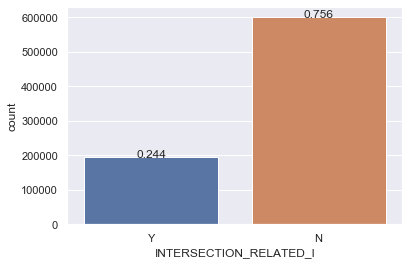

In [54]:
ax = sns.countplot(x='INTERSECTION_RELATED_I', data=df_full)
total = float(len(df_full))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}'.format(height/total),
            ha="center") 

> 24.4 car accidents were intersection related.

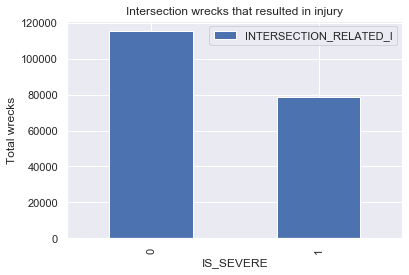

In [55]:
# graph based off how many intersection related crash were severe
df = df_full[['INTERSECTION_RELATED_I','IS_SEVERE']]
df = df[df['INTERSECTION_RELATED_I'] == 'Y']

ax = df.groupby(['IS_SEVERE']).count().plot(kind='bar')
ax.set_ylabel('Total wrecks')
ax.set_title('Intersection wrecks that resulted in injury')
plt.show()

In [56]:
inter_severe_len = len(df[df['IS_SEVERE'] == 1])

inter_severe_rate = (inter_severe_len / len(df)) * 100

print(round(inter_severe_rate,1), 'percent of intersection related crashes resulted in injury.')

40.5 percent of intersection related crashes resulted in injury.


> 40.5 percent of intersection crashes results in an injury

### not_right_of_way_i

In [57]:
na_val_count('NOT_RIGHT_OF_WAY_I')

.isna().sum() =  0
value_counts:
N    768411
Y     26184
Name: NOT_RIGHT_OF_WAY_I, dtype: int64


### prim_contributory_cause

In [58]:
na_val_count('PRIM_CONTRIBUTORY_CAUSE')

.isna().sum() =  0
value_counts:
UNABLE TO DETERMINE                                                                 268099
FOLLOWING TOO CLOSELY                                                               102451
FAILING TO YIELD RIGHT-OF-WAY                                                        97778
IMPROPER OVERTAKING/PASSING                                                          41598
NOT APPLICABLE                                                                       37253
FAILING TO REDUCE SPEED TO AVOID CRASH                                               37223
IMPROPER LANE USAGE                                                                  33391
IMPROPER BACKING                                                                     31725
IMPROPER TURNING/NO SIGNAL                                                           29227
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  22004
DISREGARDING TRAFFIC SIGNALS                             

In [59]:
# grabbing top 10 causes for graph
top_prim = list(df_full['PRIM_CONTRIBUTORY_CAUSE'].value_counts().index[1:11])

df_list = []

#appending dfs to list based on condition
for cause in top_prim:
    df = df_full[df_full['PRIM_CONTRIBUTORY_CAUSE'] == cause]
    df_list.append(df)

#concate all in list to single df
df_top_prime = pd.concat(df_list)

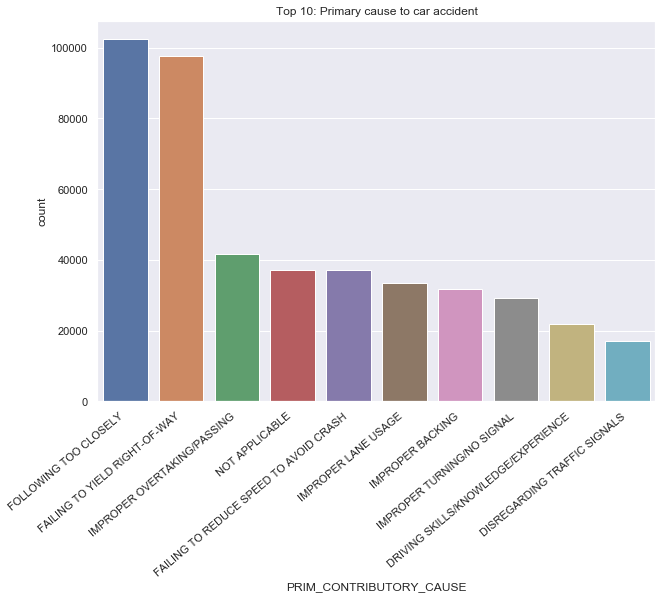

In [60]:
fig, ax = plt.subplots(figsize=(10,7))

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
sns.countplot(x='PRIM_CONTRIBUTORY_CAUSE', data=df_top_prime).set_title('Top 10: Primary cause to car accident');

### work_zone_type

In [61]:
na_val_count('WORK_ZONE_TYPE')

.isna().sum() =  0
value_counts:
N               790478
CONSTRUCTION      2939
UNKNOWN            541
MAINTENANCE        396
UTILITY            241
Name: WORK_ZONE_TYPE, dtype: int64


### workers_present_i

In [62]:
na_val_count('WORKERS_PRESENT_I')

.isna().sum() =  0
value_counts:
N    793505
Y      1090
Name: WORKERS_PRESENT_I, dtype: int64


### num_units

In [63]:
na_val_count('NUM_UNITS')

.isna().sum() =  0
value_counts:
2     702074
3      54825
1      24023
4      10183
5       2298
6        694
7        219
8        106
14        83
9         56
10        21
11         7
18         2
12         2
16         1
15         1
Name: NUM_UNITS, dtype: int64


In [64]:
df_full['NUM_UNITS'] = df_full[df_full['NUM_UNITS'] < 10]
df_full['NUM_UNITS'].fillna(1, inplace =True)
df_full['NUM_UNITS'] = df_full['NUM_UNITS'].astype(int)

na_val_count('NUM_UNITS')

.isna().sum() =  0
value_counts:
0    662625
1     92633
2     24797
3      9891
4      3250
5       865
6       330
7       130
8        74
Name: NUM_UNITS, dtype: int64


### crash_hour

In [65]:
na_val_count('CRASH_HOUR')

.isna().sum() =  0
value_counts:
16    63661
17    63010
15    62850
14    55437
18    50965
13    49754
12    47096
8     43929
11    40265
9     37024
19    36279
10    36043
7     35546
20    27976
21    24904
22    22744
23    18438
6     17539
0     14137
1     11632
2     10037
5      9906
3      7987
4      7436
Name: CRASH_HOUR, dtype: int64


### crash_day_of_week

In [66]:
na_val_count('CRASH_DAY_OF_WEEK')

.isna().sum() =  0
value_counts:
6    131283
7    115787
5    115523
3    115152
4    114387
2    110201
1     92262
Name: CRASH_DAY_OF_WEEK, dtype: int64


### crash_month

In [67]:
na_val_count('CRASH_MONTH')

.isna().sum() =  0
value_counts:
10    80293
11    74096
9     74028
8     71479
12    69557
7     68257
6     65233
5     63334
1     59559
3     58125
2     56631
4     54003
Name: CRASH_MONTH, dtype: int64


## Exporting cleaned data

In [68]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 794595 entries, 0 to 794843
Data columns (total 29 columns):
NUM_PASSENGERS             794595 non-null int32
CMRC_VEH_I                 794595 non-null object
VEHICLE_DEFECT             794595 non-null object
EXCEED_SPEED_LIMIT_I       794595 non-null object
FIRST_CONTACT_POINT        794595 non-null object
CITY                       794595 non-null object
SEX                        794595 non-null object
DRIVERS_LICENSE_CLASS      794595 non-null object
SAFETY_EQUIPMENT           794595 non-null object
POSTED_SPEED_LIMIT         794595 non-null object
TRAFFIC_CONTROL_DEVICE     794595 non-null object
DEVICE_CONDITION           794595 non-null object
WEATHER_CONDITION          794595 non-null object
LIGHTING_CONDITION         794595 non-null object
FIRST_CRASH_TYPE           794595 non-null object
TRAFFICWAY_TYPE            794595 non-null object
ALIGNMENT                  794595 non-null object
ROADWAY_SURFACE_COND       794595 non-nu

> There is no missing or odd values in dataset. All datatypes are correct.   
> This data-set is ready to be exported and modeled on.

In [69]:
df_full.to_csv('data/Cleaned_full_data')
df_full

,NUM_PASSENGERS,CMRC_VEH_I,VEHICLE_DEFECT,EXCEED_SPEED_LIMIT_I,FIRST_CONTACT_POINT,CITY,SEX,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,PRIM_CONTRIBUTORY_CAUSE,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,IS_SEVERE
0,0,N,NO,N,FRONT,CHICAGO,M,D,USAGE UNKNOWN,between 31 mph and 49 mph,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,Y,N,UNABLE TO DETERMINE,N,N,0,12,3,8,0
1,0,N,NO,N,FRONT-LEFT,Out of Town,M,D,SAFETY BELT/HELMENT USED,between 31 mph and 49 mph,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,Y,N,UNABLE TO DETERMINE,N,N,0,12,3,8,0
2,0,N,NO,N,FRONT,Out of Town,M,D,SAFETY BELT/HELMENT USED,30 mph or lower,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,N,N,FOLLOWING TOO CLOSELY,N,N,0,17,6,7,0
3,0,N,NO,N,REAR,Out of Town,M,D,SAFETY BELT/HELMENT USED,30 mph or lower,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,N,N,FOLLOWING TOO CLOSELY,N,N,0,17,6,7,0
4,0,N,NO,N,FRONT,CHICAGO,M,D,USAGE UNKNOWN,30 mph or lower,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,N,N,UNABLE TO DETERMINE,N,N,0,11,4,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794839,1,N,NO,N,SIDE-RIGHT,Out of Town,M,D,USAGE UNKNOWN,30 mph or lower,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,WET,NO DEFECTS,Y,N,DISREGARDING TRAFFIC SIGNALS,N,N,1,23,7,11,1
794840,0,N,NO,N,UNKNOWN,CHICAGO,X,D,USAGE UNKNOWN,30 mph or lower,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,N,N,UNABLE TO DETERMINE,N,N,0,11,7,11,0
794841,0,N,NO,N,UNKNOWN,CHICAGO,X,D,USAGE UNKNOWN,30 mph or lower,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,UNKNOWN,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,N,N,UNABLE TO DETERMINE,N,N,0,18,7,11,0
794842,0,N,NO,N,FRONT,CHICAGO,M,D,USAGE UNKNOWN,30 mph or lower,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,N,N,IMPROPER OVERTAKING/PASSING,N,N,0,19,7,11,0
